# Test 50: The median test of two populations

## Objective

- You have two random samples from two populations
- Do the 2 populations have the same frequency distribution

## Assumptions

- The samples are assumed to be reasonably large

## Method

- Using the 2 samples, combine them into a single sample, and compute the median $M$

- Then, create the contingency table below 

| | Sample 1 | Sample 2 | Total | 
| - | - | - | - |
| Left of Median | a | b | a + b |
| Right of Median | c | d | c + d |
| Total | $n_1$ | $n_2$ | N |

- Then, compute the test statistic as

$$\begin{aligned}
    \chi^2 &= \frac{(|ad - bc| - \frac{1}{2}N)^2 \cdot N}{(a+b)(a+c)(b+d)(c+d)}
\end{aligned}$$

- The test statistic follows a chi square distribution with 1 degree of freedom

## Proof

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sample_size = 250

def get_test_statistic():
    sample1 = np.random.normal(50,20,sample_size)
    sample2 = np.random.normal(50,20,sample_size)
    combined_median = np.median(np.concatenate((sample1, sample2)))

    a = np.sum(sample1 < combined_median)
    b = np.sum(sample2 < combined_median)
    c = np.sum(sample1 >= combined_median)
    d = np.sum(sample2 >= combined_median)

    test_statistic = (
        ((np.abs((a*d)-(b*c)) - 0.5*sample_size)**2 * sample_size) /
        ((a+b) * (a+c) * (b+d) * (c+d))
    )
    return test_statistic

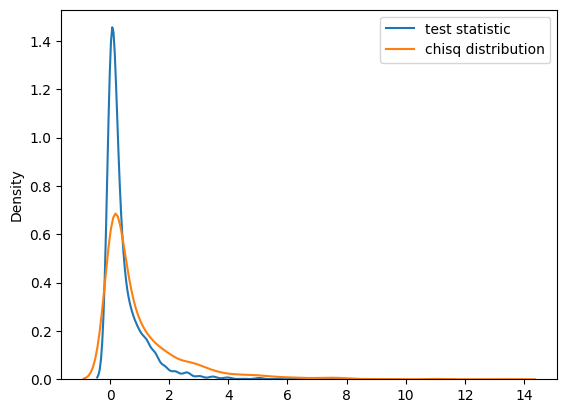

In [15]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(1, 3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisq distribution')
plt.legend()